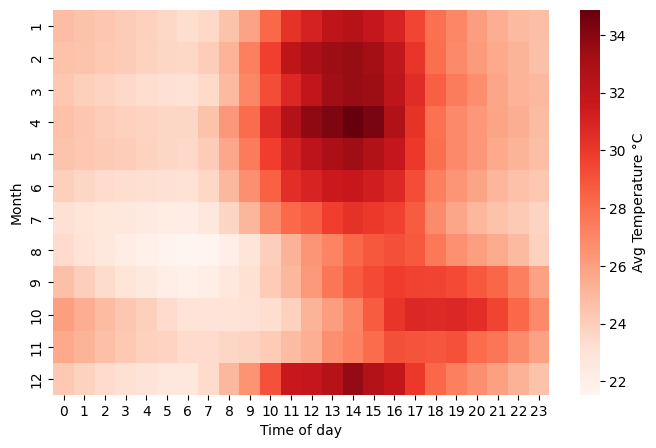

In [11]:
import seaborn as sns
import pandas as pd
df_radiacion = pd.read_csv('datos.csv', sep=",")
#df_radiacion = df_radiacion[df_radiacion['Fecha']=='2020-05-02']
#df_radiacion=df_radiacion.groupby('Hora', as_index=False)['Temperatura','Radiacion'].mean()
df_radiacion['Mes'] = pd.to_datetime(df_radiacion['Fecha'], format='%Y-%m-%d').dt.strftime('%m').astype('int')
df_radiacion['Temperatura'] = df_radiacion['Temperatura'] - 273.15
df_radiacion.head(n=15)
df_radiacion=df_radiacion.groupby(['Mes','Hora'], as_index=False)[['Temperatura','Radiacion']].mean()
df_radiacion = df_radiacion.pivot(index='Mes', columns='Hora', values='Temperatura')
df_radiacion.style.format()
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(data=df_radiacion, cmap = 'Reds', annot=False)
plt.xlabel('Time of day')
plt.ylabel('Month')

cbar = ax.collections[0].colorbar
cbar.set_label('Avg Temperature °C')



In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('datos.csv', sep=";")
df.head(n=30)



In [ ]:
df.describe()

In [ ]:
df2=df.loc[(df['Fecha'] == '2020-05-02')]
df2 = df2.groupby('Hora', as_index=False)[['Temperatura','Radiacion']].mean()
df2.style.format()

fig, ax = plt.subplots()
pos = ax.plot(df2['Hora'].values, df2['Temperatura'], 'o-');
ax.set_xlabel("Hora")
ax.set_ylabel("Temperatura")
ax.set_title("Temperatura del Día ")

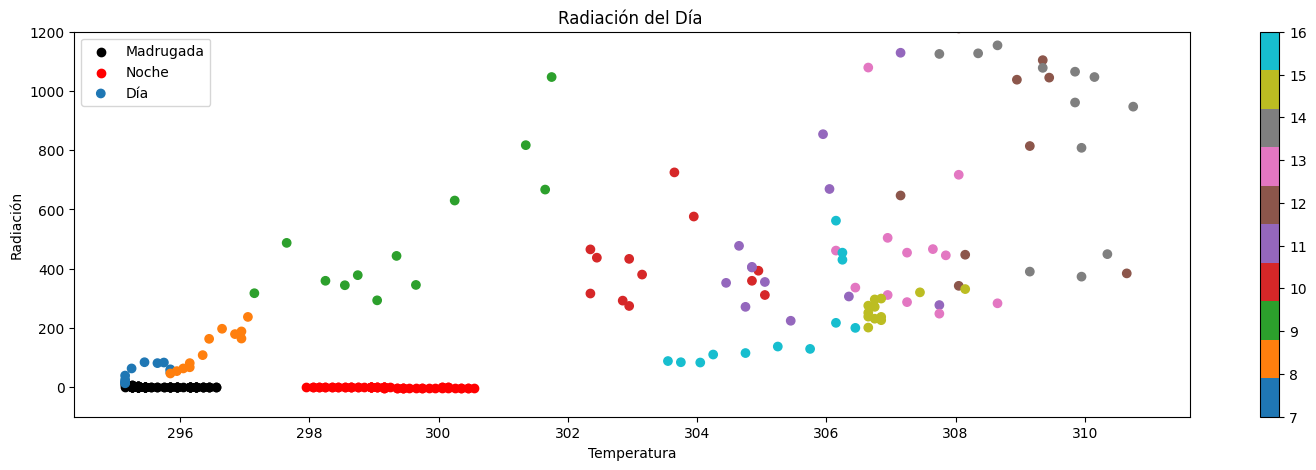

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dffiltrado=df.loc[(df['Fecha'] == '2020-05-06')]
df1=dffiltrado.loc[(df['Hora'] >= 0) & (df['Hora'] <= 6)]
df2=dffiltrado.loc[(df['Hora'] >= 19) & (df['Hora'] <= 23)]
df3=dffiltrado.loc[(df['Hora'] >= 7) & (df['Hora'] <= 16)]

fig, ax = plt.subplots(figsize = (18,5))
pos = ax.scatter(df1['Temperatura'].values, df1['Radiacion'], c='black',    label='Madrugada')
pos = ax.scatter(df2['Temperatura'].values, df2['Radiacion'], c='red',  label='Noche')
pos = ax.scatter(df3['Temperatura'].values, df3['Radiacion'], c=df3['Hora'],   label='Día', cmap='tab10')

ax.set_ylim(-100,1200)
ax.set_xlabel("Temperatura")
ax.set_ylabel("Radiación")
ax.set_title("Radiación del Día ")
ax.legend()
fig.colorbar(pos);

In [ ]:
df2=df.loc[(df['Fecha'] == '2020-05-02')]
df2 = df2.groupby('Hora', as_index=False)[['Temperatura','Radiacion']].mean()

fig, ax = plt.subplots()
pos = ax.scatter(df2['Hora'].values, df2['Radiacion'], s=2**(df2['Temperatura']-298), c=df2['Temperatura'],
                 alpha = 0.55, palette='Reds')
fig.colorbar(pos);
ax.set_xlabel("Time of Day")
ax.set_ylabel("Radiance ($W/m^2$)")




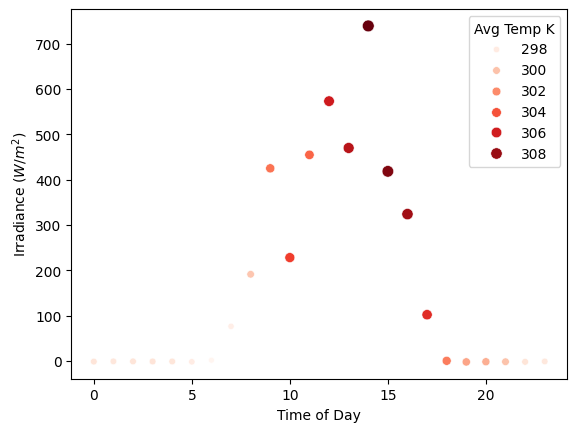

In [24]:
import pandas as pd
df = pd.read_csv('datos.csv', sep=",")
df.head(n=30)

df2=df.loc[(df['Fecha'] == '2020-05-02')]
df2 = df2.groupby('Hora', as_index=False)[['Temperatura','Radiacion']].mean()
ax = sns.scatterplot(data=df2, x='Hora', y='Radiacion', size=df2['Temperatura'],
                      hue='Temperatura', palette='Reds')
ax.set_xlabel("Time of Day")
ax.set_ylabel("Irradiance ($W/m^2$)")

legend = ax.legend()
legend.set_title('Avg Temp K')

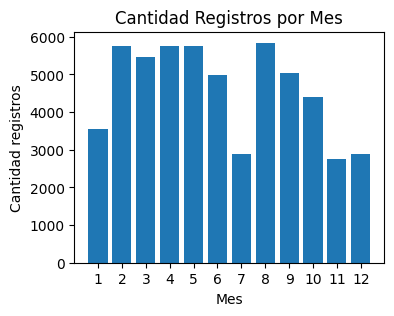

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df['Mes'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d').dt.strftime('%m').astype('int')
df['Anio'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d').dt.strftime('%Y').astype('int')
#df.head()

#df=df.loc[(df['Mes'] == 1) | (df['Mes'] == 4)]
datos = df.groupby('Mes', as_index=False)['Temperatura'].count()
datos.head(n=15)


meses = list(datos['Mes'].values)
valores = list(datos['Temperatura'].values)

fig = plt.figure(figsize=(4,3))
ax = plt.axes()

ax.bar(meses, valores);
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad registros')
ax.set_title('Cantidad Registros por Mes');
ax.set_xticks(meses)


<ipython-input-7-c782f7aa1734>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


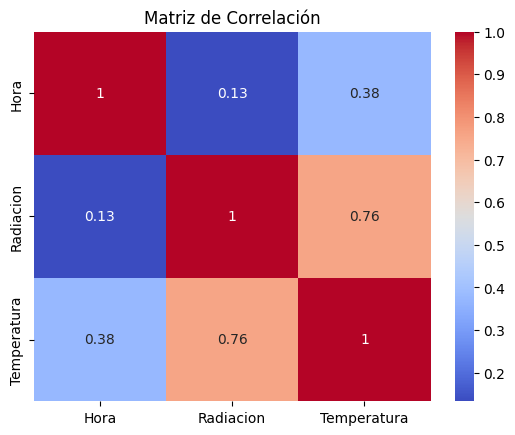

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#df2=df.loc[(df['Hora'] >= 8) & (df['Hora'] <= 15)]
df2=df
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

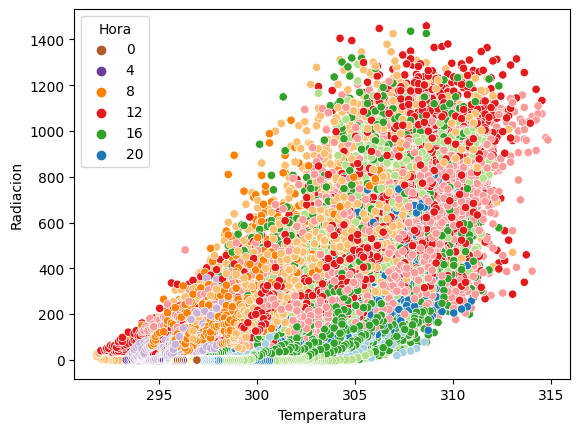

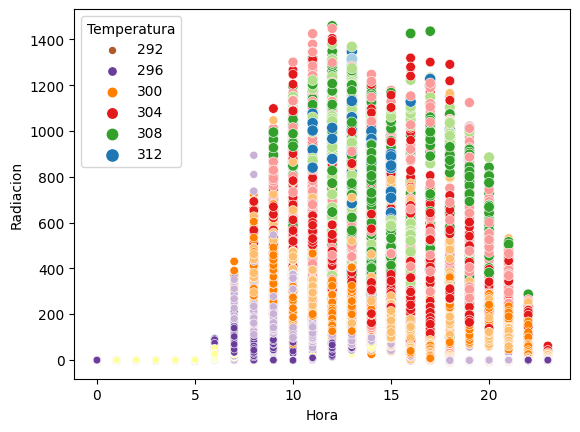

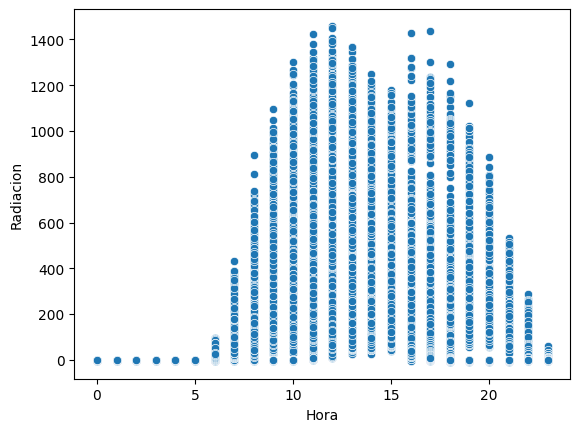

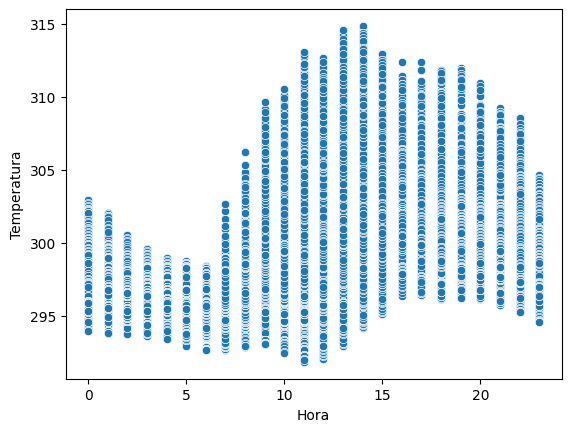

<ipython-input-62-f6a2d569175e>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_plot.corr()


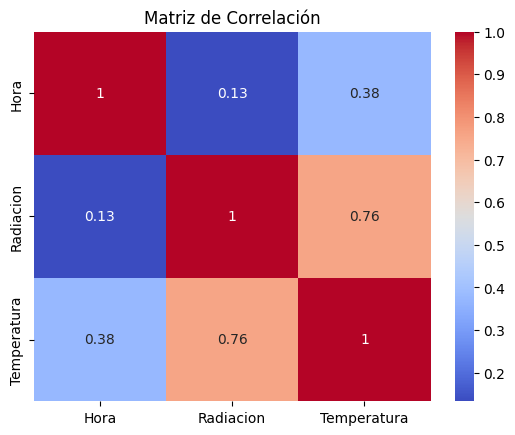

In [ ]:
#plt.scatter(x=df.Temperature, y=df.Radiation)
#plt.xlabel("")
#plt.ylabel("")
#plt.show()

import seaborn as sns
import pandas as pd

#df2=df.loc[(df['Hora'] >= 18) & (df['Hora'] <= 23)]
import matplotlib.pyplot as plt
df_plot = df

fig = sns.scatterplot(data=df_plot, x='Temperatura', y='Radiacion', hue='Hora', palette='Paired_r')
plt.show()

fig = sns.scatterplot(data=df_plot, x='Hora', y='Radiacion', size='Temperatura',
 hue='Temperatura', palette='Paired_r')
plt.show()

fig = sns.scatterplot(data=df_plot, x='Hora', y='Radiacion' )
plt.show()

fig = sns.scatterplot(data=df_plot, x='Hora', y='Temperatura' )
plt.show()


correlation_matrix = df_plot.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

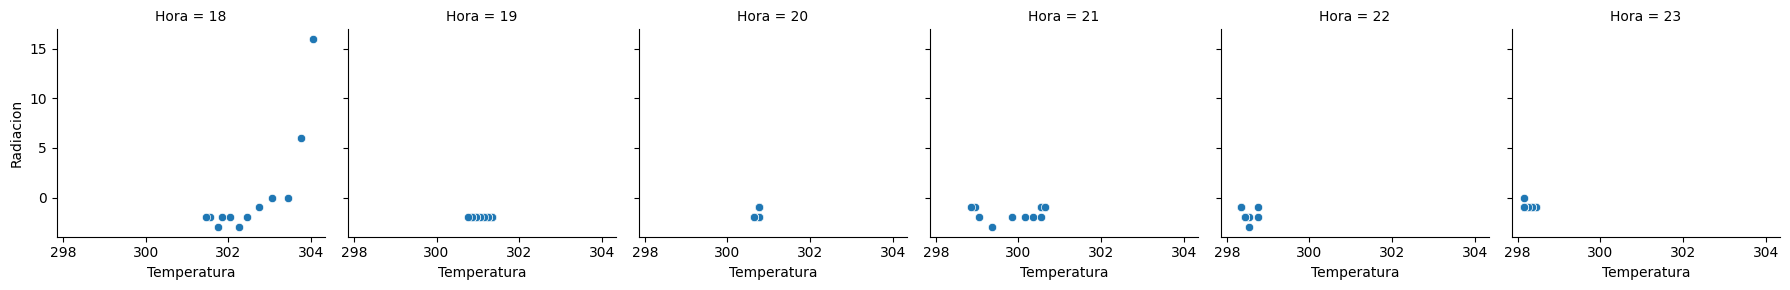

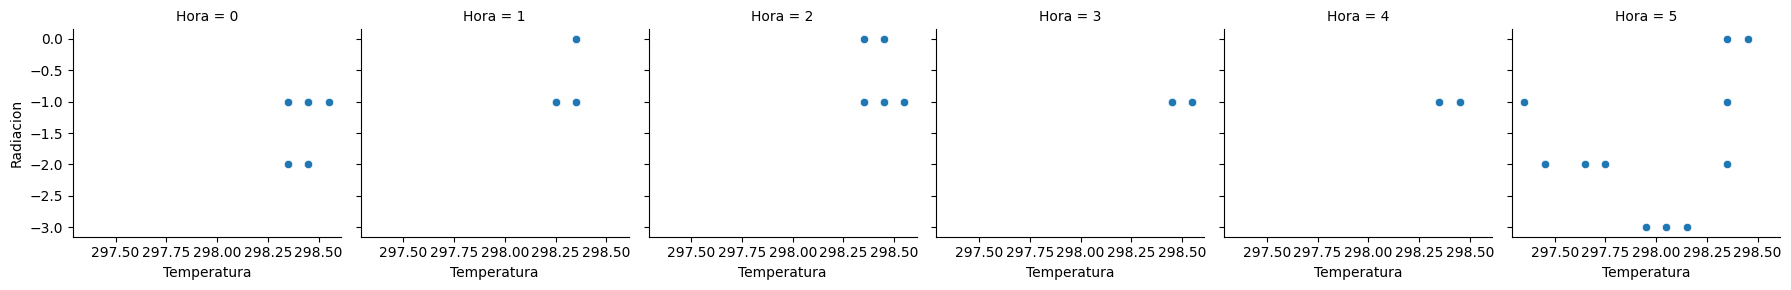

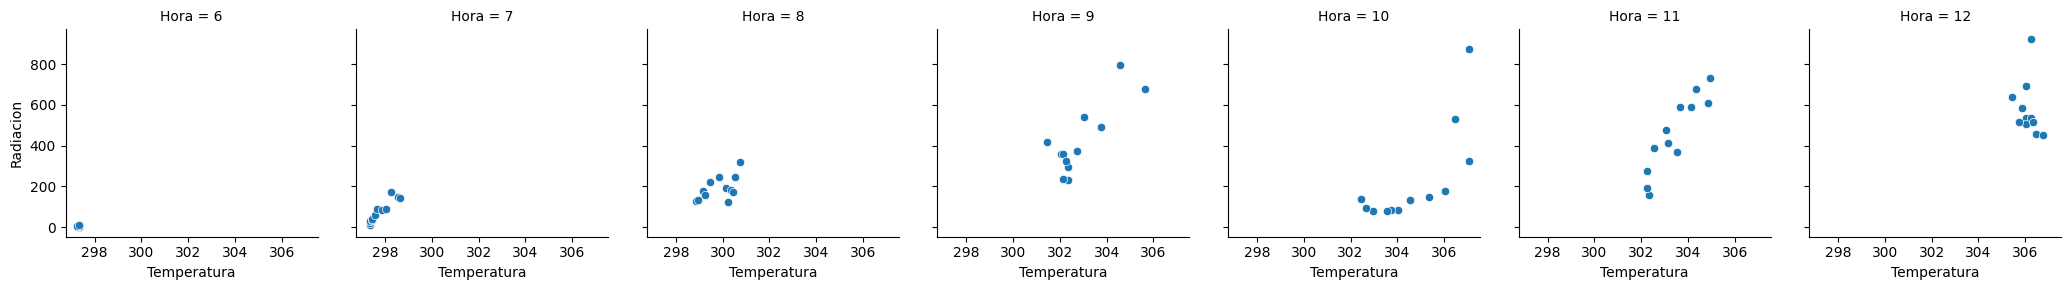

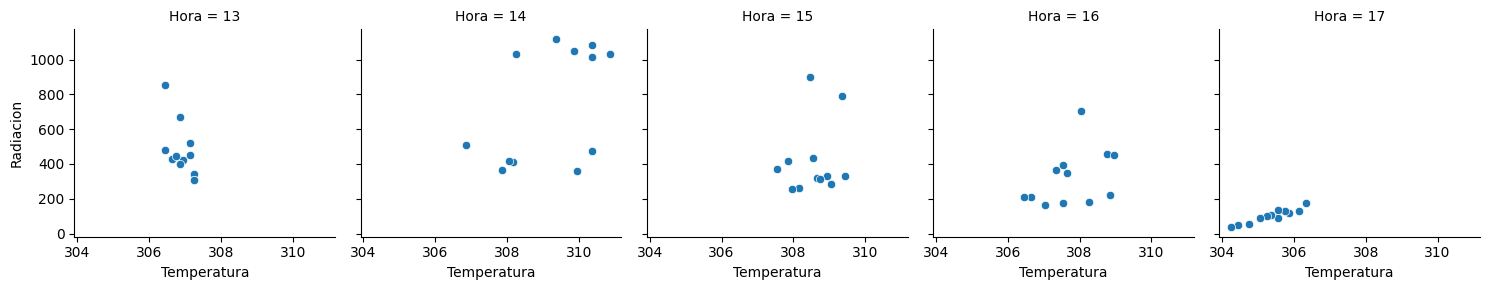

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df2=df.loc[(df['Fecha'] == '2020-05-02')]

facet_grid = sns.FacetGrid(data=df2.loc[(df['Hora'] >= 18) & (df2['Hora'] <= 23)], col='Hora')
facet_grid.map(sns.scatterplot, 'Temperatura', 'Radiacion')
plt.show()

facet_grid = sns.FacetGrid(data=df2.loc[(df2['Hora'] >= 0) & (df2['Hora'] <= 5)], col='Hora')
facet_grid.map(sns.scatterplot, 'Temperatura', 'Radiacion')
plt.show()

facet_grid = sns.FacetGrid(data=df2.loc[(df2['Hora'] >= 6) & (df2['Hora'] <= 12)] , col='Hora')
facet_grid.map(sns.scatterplot, 'Temperatura', 'Radiacion')
plt.show()

facet_grid = sns.FacetGrid(data=df2.loc[(df2['Hora'] >= 13) & (df2['Hora'] <= 17)] , col='Hora')
facet_grid.map(sns.scatterplot, 'Temperatura', 'Radiacion')
plt.show()

<ipython-input-10-449a9213b9b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.loc[(df['Hora'] >= 18) & (df['Hora'] <= 23)].corr()


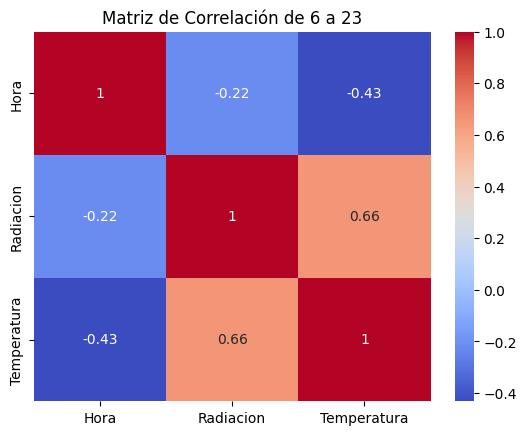

<ipython-input-10-449a9213b9b8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.loc[(df['Hora'] >= 6) & (df['Hora'] <= 17)].corr()


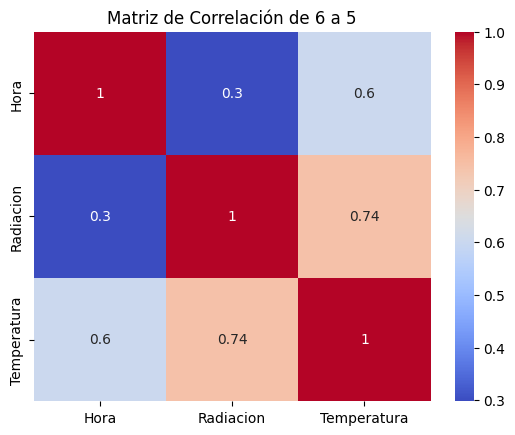

<ipython-input-10-449a9213b9b8>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.loc[(df['Hora'] >= 0) & (df['Hora'] <= 5)].corr()


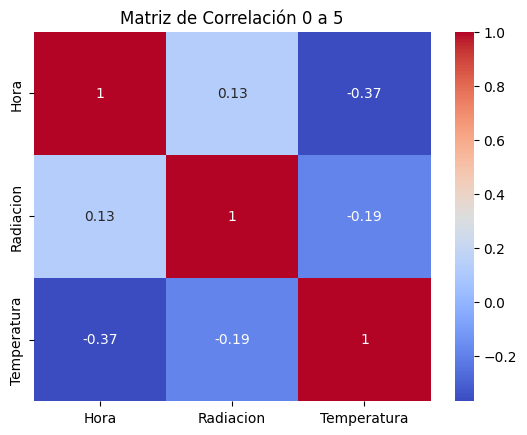

In [ ]:
correlation_matrix = df.loc[(df['Hora'] >= 18) & (df['Hora'] <= 23)].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de 6 a 23')
plt.show()

correlation_matrix = df.loc[(df['Hora'] >= 6) & (df['Hora'] <= 17)].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de 6 a 5')
plt.show()

correlation_matrix = df.loc[(df['Hora'] >= 0) & (df['Hora'] <= 5)].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación 0 a 5')
plt.show()